# 🚜   Predicting the sale price of Bulldozers using machine learning

The goal is predicting the sale price of bulldozers.

## 1. Problem definition
> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar

## 2. Data
The data is in local disk

## 3. Evaluation
The evaluation metric for this project is the RMSLE (root mean squared log error) b/w the actual price and the predicted aution price

Note: The goal for most regression evaluation metrics is to minimize the error. For example, our goal here will be to build a ML model which minimizes RMSLE

## 4. Features
 Go to data dictionary and you will find it there
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
# importing the training and validation data

df = pd.read_csv("C:/Users/MARCELLINUS CHIMAOBI/Videos/Udemy ML & Data/Projects/Project_2/kaggle_data/TrainAndValid.csv",
                low_memory = False)

In [3]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,11/16/2006 0:00,3/26/2004 0:00,2/26/2004 0:00,5/19/2011 0:00,7/23/2009 0:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [6]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [7]:
# the percentge  missing data
round((df.isnull().sum()) / len(df) * 100, ndigits = 3)

SalesID                      0.000
SalePrice                    0.000
MachineID                    0.000
ModelID                      0.000
datasource                   0.000
auctioneerID                 4.879
YearMade                     0.000
MachineHoursCurrentMeter    64.259
UsageBand                   82.149
saledate                     0.000
fiModelDesc                  0.000
fiBaseModel                  0.000
fiSecondaryDesc             34.099
fiModelSeries               85.785
fiModelDescriptor           81.871
ProductSize                 52.485
fiProductClassDesc           0.000
state                        0.000
ProductGroup                 0.000
ProductGroupDesc             0.000
Drive_System                74.052
Enclosure                    0.081
Forks                       52.092
Pad_Type                    80.350
Ride_Control                62.993
Stick                       80.350
Transmission                54.444
Turbocharged                80.350
Blade_Extension     

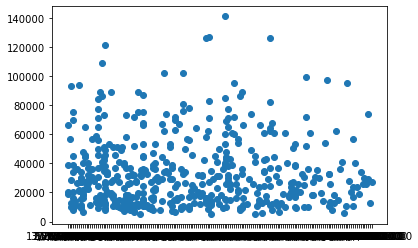

In [8]:
# visualizing the sales date and the target which is the salesPrice
fig, ax = plt.subplots()

ax.scatter(df.saledate[:500], df.SalePrice[:500])

In [9]:
df.saledate[:100]

0     11/16/2006 0:00
1      3/26/2004 0:00
2      2/26/2004 0:00
3      5/19/2011 0:00
4      7/23/2009 0:00
           ...       
95    12/15/2005 0:00
96     1/29/2004 0:00
97     9/18/2008 0:00
98     11/3/2005 0:00
99      6/1/2006 0:00
Name: saledate, Length: 100, dtype: object

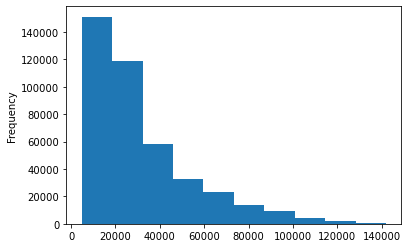

In [10]:
# lets plot a histogram checking the distribution of our data target
df.SalePrice.plot.hist();

# from the histogram it is observed that most of the sales are on items whose price are below $20,000


# working with dates

### Parsing dates

when we work with time series data, we waant to enrich the time and date component as much as possible

we can do that by telling pandas which of our columns has dates in it using `parse_dates` parameter

In [4]:
# import data but this time use parse_dates
df = pd.read_csv("C:/Users/MARCELLINUS CHIMAOBI/Videos/Udemy ML & Data/Projects/Project_2/kaggle_data/TrainAndValid.csv",
                low_memory = False,
                parse_dates = ["saledate"])
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.saledate.dtype

dtype('<M8[ns]')

In [7]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

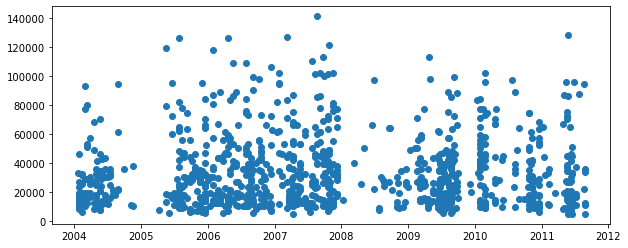

In [5]:
fig, ax = plt.subplots(figsize = (10, 4))
ax.scatter(df.saledate[:1000], df.SalePrice[:1000] );

### Sort DataFrame by saledate

When working with series data, it's good idea to sort it by date

In [5]:
# sorting the saledate column in asending order 
df.sort_values(by = ["saledate"], ascending = True, inplace = True)

df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [7]:
df["saledate"].head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [8]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### Make a copy of the original DataFrame

we make a copy of the original df so when we manipulate the copy, we've still got our original data.  

In [6]:
df_tmp = df.copy()

In [7]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### Add datetime parameter for `saledate` column


In [8]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [9]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [10]:
# having perform feature engineering, with datetime features
# we remove 'saledate' column

df_tmp.drop('saledate', axis = 1, inplace = True)

In [11]:
# check the values of different columns

df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

<AxesSubplot:>

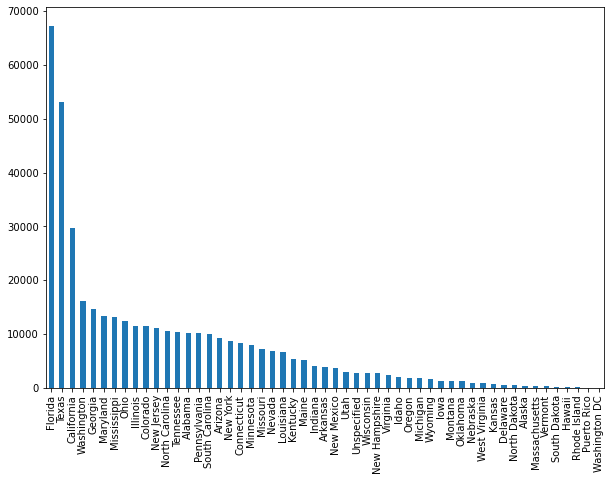

In [15]:
fig, ax = plt.subplots(figsize = (10, 7))
df.state.value_counts().plot.bar()

In [16]:
df_tmp.saledate[:1].dt.day

AttributeError: 'DataFrame' object has no attribute 'saledate'

In [17]:
df_tmp.saledate[:1]

AttributeError: 'DataFrame' object has no attribute 'saledate'

## 5. Modelling

we have done enough EDA (We could always do more) but let's start to do some model-EDA

In [12]:
# Let's build a ML model to predict the sale price
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs = -1,
                             random_state = 42)
model.fit(df_tmp.drop("SalePrice", axis = 1), df_tmp["SalePrice"])

KeyboardInterrupt: 

In [27]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

from the error above, all our values are not in numeric format  



### Convert string to categories 

One way to we can turn all our data into numbers is by converting them into pandas categories

In [13]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [14]:
# find the columns which contains string 

for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print (label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [15]:
#   This will turn all of the string values into categorical values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content) == True:
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [16]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [17]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [18]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Thanks to pandas Categories we now have a way to access all our data in the form of numbers.

But we still have a bunch of missing  data

In [19]:
df_tmp.isnull().sum() / len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save preprocessed Data

Since we have done a lot of changes in our dataframe, let's save the current dataframe by exporting and converting it to csv


In [20]:
df_tmp.to_csv("C:/Users/MARCELLINUS CHIMAOBI/Desktop/ml_git/Bulldozer_project/trainvalcat.csv",
             index = False)

In [21]:
# import preprocessed data
df_tmp = pd.read_csv("C:/Users/MARCELLINUS CHIMAOBI/Desktop/ml_git/Bulldozer_project/trainvalcat.csv",
                low_memory = False)
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


### Filling missing values

#### Fill numeric data first

In [22]:
# let me get names of columns that have numerical data
for label, content in df_tmp.items():
        if pd.api.types.is_numeric_dtype(content):
            print (label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [23]:
# check for which numeric columns have missing values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print (label)

auctioneerID
MachineHoursCurrentMeter


In [24]:
# fill numeric roll with the median

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Add a binary column which tells us if the data was missing
            df_tmp[label + "is missing"] = pd.isnull(content)
            #fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [25]:
# demostrate how median is more robust than mean
hundreds = np.full((1000), 100)
hundred_billion = np.append(hundreds, 1000000000)
np.mean(hundreds), np.mean(hundred_billion), np.median(hundreds), np.median(hundred_billion)

(100.0, 999100.8991008991, 100.0, 100.0)

In [26]:
# check if there is any numeric column with missing value
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print (label)




In [27]:
# check to see how many examples where missing 
df_tmp["auctioneerIDis missing"].value_counts()

False    392562
True      20136
Name: auctioneerIDis missing, dtype: int64

In [28]:
df_tmp.isna().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                             339028
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                       140727
fiModelSeries                         354031
fiModelDescriptor                     337882
ProductSize                           216605
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                          305611
Enclosure                                334
Forks                                 214983
Pad_Type  

### Filling and turning categorical variables into numbers

In [29]:
# check for columns which aren't numerical

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        continue
    else:
        print (label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [30]:
# check for columns which aren't numerical (another code format)

for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print (label)


UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [31]:
# Turn categorical variables into numbers and fill missing 
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Add  binary  column to indicate weather value has missing value or not
        df_tmp[label+"_is_missing"] =  pd.isnull(content)
        #turn categorical into numbers and add 1 (+1)
        df_tmp[label] = pd.Categorical(content).codes + 1 # we add one cause pandas categorical automatically fills missing values with -1. so adding 1 makes it 0
        
        

In [32]:
pd.Categorical(df_tmp["UsageBand"]).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [33]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [34]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [35]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

now that all of our data is numeric and there is no missing value in our df we should be able to build a ML mode

In [36]:
# %%time
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor(n_jobs = -1,
#                              random_state = 42)
# model.fit(df_tmp.drop("SalePrice", axis = 1), df_tmp["SalePrice"])

In [37]:
%%time
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs = -1,
                             random_state = 42)
model.fit(df_tmp.drop("SalePrice", axis = 1)[:1000], df_tmp["SalePrice"][:1000])

Wall time: 7.08 s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [38]:
df_tmp[:1000]

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1301453,22000.0,1399794,4123,132,1.0,1973,0.0,0,2298,...,True,True,True,True,True,False,False,False,True,True
996,1510118,66000.0,1326607,3778,132,1.0,1988,0.0,0,1716,...,True,True,True,True,True,True,True,True,False,False
997,1404462,29000.0,1391761,7110,132,1.0,1987,0.0,0,744,...,True,True,True,True,True,True,True,True,True,True
998,1390961,32000.0,1125869,7008,132,1.0,1973,0.0,0,322,...,False,False,False,False,False,True,True,True,True,True


In [39]:
model.score(df_tmp.drop("SalePrice", axis = 1)[:1000], df_tmp["SalePrice"][:1000])

0.9772287876532858

In [40]:
from sklearn.metrics import r2_score 
t_pred = model.predict(df_tmp.drop("SalePrice", axis = 1)[:1000])
r2_score(df_tmp["SalePrice"][:1000], t_pred)

0.9772287876532858

In [41]:
pred = model.predict(df_tmp.drop(["SalePrice"], axis = 1)[1001:1500])

In [42]:
true = np.array(df_tmp["SalePrice"][1001:1500])

In [43]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error,mean_absolute_error
np.sqrt(mean_squared_log_error(true, pred))

0.28108608258122647

In [44]:
mean_squared_error(true, pred)

100661368.84519038

In [45]:
mean_absolute_error(true, pred)

6469.932865731463

#### We need to formally split the data into train and valid test

In [46]:
df_tmp["saleYear"]

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [47]:
train_set = df_tmp[df_tmp["saleYear"] != 2012]
valid_set = df_tmp[df_tmp["saleYear"] == 2012]
# train_set.saleYear
valid_set.saleYear

401125    2012
401126    2012
401127    2012
401128    2012
401129    2012
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 11573, dtype: int64

In [48]:
# df_tmp.saleYear.value_counts()
train_set.saleYear.value_counts().sum(), valid_set.saleYear.value_counts()

(401125,
 2012    11573
 Name: saleYear, dtype: int64)

In [49]:
# working with  the train_set and valid_Set
# split data into X and Y
X_train = train_set.drop("SalePrice", axis = 1)
y_train = train_set["SalePrice"]
X_valid = valid_set.drop("SalePrice", axis = 1)
y_valid = valid_set["SalePrice"]

# comparing shapes to each other 
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape 

((401125, 102), (401125,), (11573, 102), (11573,))

### Building an evaluation function

In [50]:
# create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_pred):
    valid_preds = model.predict(X_valid)
    return np.sqrt(mean_squared_log_error(y_test, y_pred))

# create a function to evaluate model on a few different levels
def show_scores(model):
    #train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    scores = {#"Training MAE": mean_absolute_error(y_train, train_preds),
             "Valid MAE": mean_absolute_error(y_valid, valid_preds),
             #"Training RMSLE": rmsle(y_train, train_preds),
             "Valid RMSLE": rmsle(y_valid, valid_preds),
             #"Training R^2": r2_score(y_train, train_preds),
             "Valid R^2": r2_score(y_valid, valid_preds)}
    return scores


## Testing our model on a subset (to tune our hyperparameters)

In [51]:
# # this takes far too long.... for experimenting 

# model = RandomForestRegressor(n_jobs = -1,
#                              random_state = 42)
# model.fit(X_train, y_train)

In [52]:
# change max_samples value
model = RandomForestRegressor(n_jobs = -1,
                             random_state = 42,
                             max_samples = 10000)

In [53]:
%%time
# cutting down on max number of samples each estimator can see imporoves training time
model.fit(X_train, y_train)

Wall time: 1min 14s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [54]:
show_scores(model)

{'Valid MAE': 7177.26365505919,
 'Valid RMSLE': 0.29362638671089003,
 'Valid R^2': 0.8320374995090507}

In [55]:
# to evaluate the root mean log square error 
# executing it for only valid predict 
valid_preds = model.predict(X_valid)
rmsle(y_valid, valid_preds)

0.29362638671089003

In [56]:
X_train.shape[0]

401125

### Hyperparameter tuning with RandomizedSearchCV



In [125]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameter
rf_grid = {"n_estimators": np.arange(10, 100, 10),
          "max_depth": (None, 3, 5, 10),
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2),
          "max_features": [0.5, 1, "sqrt", "auto"],
          "max_samples": [10000]}

# instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,
                                                   random_state = 42),
                             param_distributions = rf_grid,
                             n_iter = 2,
                             cv = 5,
                              n_jobs = -1,
                             verbose = True)
# fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: 

### Train the model with best hyperparameters
**Note:** These were found after 100 iteration of RandomizedSearchCV

In [68]:
%%time

# most ideaal hyperparameters
ideal_model = RandomForestRegressor(n_estimators = 40,
                                   min_samples_leaf = 1,
                                   min_samples_split = 14,
                                   max_features = 0.5,
                                   n_jobs = -1,
                                   max_samples = None,
                                   random_state = 42)

ideal_model.fit(X_train[:150000], y_train[:150000])

Wall time: 2min 25s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [67]:
show_scores(ideal_model)

{'Valid MAE': 12786.298060899911,
 'Valid RMSLE': 0.4817613362268622,
 'Valid R^2': 0.5541519691080521}

## Make predictions  on test data

In [87]:
# import the test dataset
df_test = pd.read_csv("C:/Users/MARCELLINUS CHIMAOBI/Videos/Udemy ML & Data/Projects/Project_2/kaggle_data/Test.csv",
                     low_memory = False,
                     parse_dates = ["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [72]:
# make predictions on the test dataset
test_preds = model.predict(df_test)

ValueError: could not convert string to float: 'Low'

In [73]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [88]:
def preprocess_data(df):
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis = 1, inplace = True)
    
    # fill the numeric row with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label + "_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
    # filled categorical missing data and turn categorical into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label + "_is_missing"] = pd.isnull(content)
            # we add +1 to the category code b/c pandas encode
            df[label] = pd.Categorical(content).codes + 1
    
    
    return df

In [89]:
# process test data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [91]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [92]:
# make prediction on updated test data

model.predict(df_test)

ValueError: Number of features of the model must match the input. Model n_features is 102 and input n_features is 101 

In [93]:
# we can find how the column differ using sets
set(X_train.columns) - set(df_test.columns)

{'MachineHoursCurrentMeteris missing', 'auctioneerIDis missing'}

In [94]:
# manually adjust df_test to have auctioneerIDis missing
df_test["auctioneerIDis missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerIDis missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [95]:
# make predictions on the test data
test_preds = model.predict(df_test)

In [97]:
len(test_preds)

12457

In [98]:
test_preds

array([18866.5, 27211. , 53330. , ..., 13577.5, 16007.5, 24395. ])

In [101]:
# format predictions into the same format Kaggle is after 
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds

In [102]:
df_preds

,SalesID,SalesPrice
0,1227829,18866.5
1,1227844,27211.0
2,1227847,53330.0
3,1227848,83810.0
4,1227863,40615.0
...,...,...
12452,6643171,46385.0
12453,6643173,12760.0
12454,6643184,13577.5
12455,6643186,16007.5


In [103]:
# export prediction data 
df_preds.to_csv("C:/Users/MARCELLINUS CHIMAOBI/Videos/Udemy ML & Data/Projects/Project_2/kaggle_data/prediction.csv", index = False)

### Feature Importance

Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the **target varible**(SalePrice).

In [104]:
# find feature importance of our best model
ideal_model.feature_importances_

array([7.59023657e-02, 1.57497487e-02, 1.05463472e-01, 0.00000000e+00,
       3.83832848e-03, 2.16487405e-01, 4.98985467e-04, 3.86565718e-04,
       3.52603338e-02, 3.93408043e-02, 8.40906093e-02, 6.00542948e-03,
       7.61908514e-03, 1.38723831e-01, 4.53040218e-02, 6.23775483e-03,
       4.90302816e-03, 7.41213409e-03, 3.26515648e-03, 3.60237505e-03,
       3.75136813e-04, 3.45815977e-05, 3.77482867e-04, 1.71137986e-04,
       1.23479610e-03, 2.95268518e-05, 3.29674471e-03, 2.60071099e-03,
       1.44135005e-03, 2.71939469e-03, 1.87485061e-03, 2.04622204e-03,
       2.20317597e-03, 1.61184611e-04, 1.94851838e-03, 1.11875483e-02,
       2.29667712e-03, 2.83391605e-03, 6.96730245e-04, 1.31273013e-03,
       4.32657864e-04, 1.36209812e-03, 2.86028609e-03, 4.39618121e-04,
       7.70569568e-05, 4.68842971e-04, 2.74332405e-04, 1.97086620e-03,
       8.37794328e-04, 3.67426511e-04, 1.00267064e-04, 8.08419201e-02,
       3.55976206e-03, 5.71309969e-03, 3.02375533e-03, 9.32376603e-03,
      

In [113]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n = 20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending = False)
        .reset_index(drop = True))
    # plot the df
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

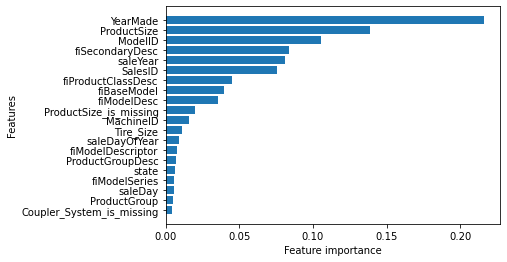

In [114]:
plot_features(X_train.columns, ideal_model.feature_importances_)